## Análise Exploratória de Dados do Dataset "Global Salaries for Data Science"

### Descrição do Dataset

O dataset "Global Salaries for Data Science" contém informações sobre os salários globais de profissionais da área de ciência de dados. As principais colunas incluem o cargo exercido, o nível de experiência, o salário anual e o país de trabalho. Este dataset fornece uma visão abrangente das variações salariais em diferentes regiões e para diferentes níveis de experiência na ciência de dados.

### Objetivos da Análise

Os principais objetivos desta análise são:
- Identificar a variação salarial por cargo.
- Analisar as diferenças salariais conforme o nível de experiência.
- Identificar os dados salariais por país.
- Explorar o contexto e fatores que influenciam essas variações salariais.
 salariais.



In [1]:
#Importando pacotes
#Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.
import pandas as pd

#Matplotlib: Possui uma série de funções e comandos para exibição de gráficos
import matplotlib.pyplot as plt

#Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)
import seaborn as sns

#Warnings: Possui uma série de funções e comandos para tratamento de mensagens de avisos e alertas do Python
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
df_dados = pd.read_csv("salaries.csv")

In [3]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
df_dados.shape

(37234, 11)

In [4]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
df_dados.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,EN,FT,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L


In [5]:
#Comando utilizado para verificar as linhas finais do DataFrame
df_dados.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
37229,2024,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
37230,2024,SE,FT,Data Scientist,195500,USD,195500,US,100,US,M
37231,2024,SE,FT,Data Scientist,141300,USD,141300,US,100,US,M
37232,2024,SE,FT,Data Engineer,139810,USD,139810,US,0,US,M
37233,2024,SE,FT,Data Engineer,95325,USD,95325,US,0,US,M


In [6]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37234 entries, 0 to 37233
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           37234 non-null  int64 
 1   experience_level    37234 non-null  object
 2   employment_type     37234 non-null  object
 3   job_title           37234 non-null  object
 4   salary              37234 non-null  int64 
 5   salary_currency     37234 non-null  object
 6   salary_in_usd       37234 non-null  int64 
 7   employee_residence  37234 non-null  object
 8   remote_ratio        37234 non-null  int64 
 9   company_location    37234 non-null  object
 10  company_size        37234 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB


### Descrição das Variáveis do Dataset

- **work_year**: O ano em que o salário foi pago.

- **experience_level**: O nível de experiência no trabalho durante o ano, com os seguintes valores possíveis:
  - **EN**: Nível de entrada.
  - **MI**: Nível júnior.
  - **SE**: Nível intermediário.
  - **EX**: Nível executivo ou diretor.

- **employment_type**: O tipo de emprego para o cargo.
  - **PT**: Meio período.
  - **FT**: Período integral.
  - **CT**: Contrato.
  - **FL**: Freelance.

- **job_title**: O cargo exercido durante o ano.

- **salary**: O valor total bru o do salário pago.

- **salary_currency**: A moeda em que o salário foi pago, de acordo com o código de moeda ISO 4217.

- **salary_in_usd**: O salário convertido em USD (taxa de câmbio dividida pela média da taxa de USD para o respectivo ano via fxdata.foorilla.com).

- **employee_residence**: O país de residência principal do funcionário durante o ano de trabalho, conforme código de país ISO 3166.

- **remote_ratio**: A quantidade total de trabalho realizado remotamente, com os seguintes valores possíveis:
  - **0**: Nenhum trabalho remoto (menos de 20%).
  - **50**: Parcialmente remoto.
  - **100**: Totalmentcompany_locatione 80%).

- **company_location**: O país do escritório principal do empregador ou da filial contratante, conforme código de país ISO 3166.

- **company_size**: O número médio de pessoas que trabalharam para a empresa durante o ano:
  - **S**: Menos de 50 funcionários (pequena).
  - **M**: 50 a 250 funcionários (média).
  - **L**: Mais de 250 funcionários (grande).


In [7]:
#Comando utilizado para fazer uma analise rápida com medidas estatisticas(Média, Mediana, Desvio Padrão, etc)
df_dados.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,37234.000000,3.723400e+04,37234.000000,37234.000000
mean,2023.656443,1.667366e+05,160540.603105,23.197884
std,0.611469,2.338090e+05,72679.876280,42.005217
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [8]:
# Removendo outliers usando o desvio padrão ou outro critério
df_filtered = df_dados[df_dados['salary'] < df_dados['salary'].mean() + 3 * df_dados['salary'].std()]

# Exibir novamente o describe
df_filtered['salary'].describe()

count     37164.000000
mean     160544.658325
std       73266.122158
min       14000.000000
25%      110000.000000
50%      150000.000000
75%      200000.000000
max      866000.000000
Name: salary, dtype: float64

In [9]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
df_dados.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_filtered.columns[0:48].tolist():
        if df_filtered.dtypes[i] == 'int64' or df_filtered.dtypes[i] == 'float64':            
            print(i, ':' , df_filtered.dtypes[i]) 
            variaveis_numericas.append(i)

work_year : int64
salary : int64
salary_in_usd : int64
remote_ratio : int64


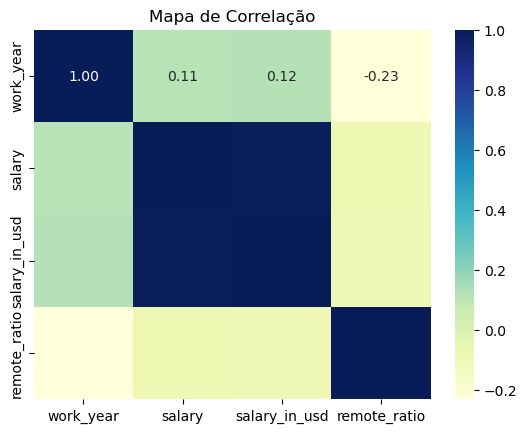

In [11]:
#Mapa de correlação
numerico_df = df_filtered.select_dtypes(include=[float, int])

sns.heatmap(numerico_df.corr(),annot=True, fmt='.2f', cmap="YlGnBu",linecolor='black')
plt.title('Mapa de Correlação')
plt.show()

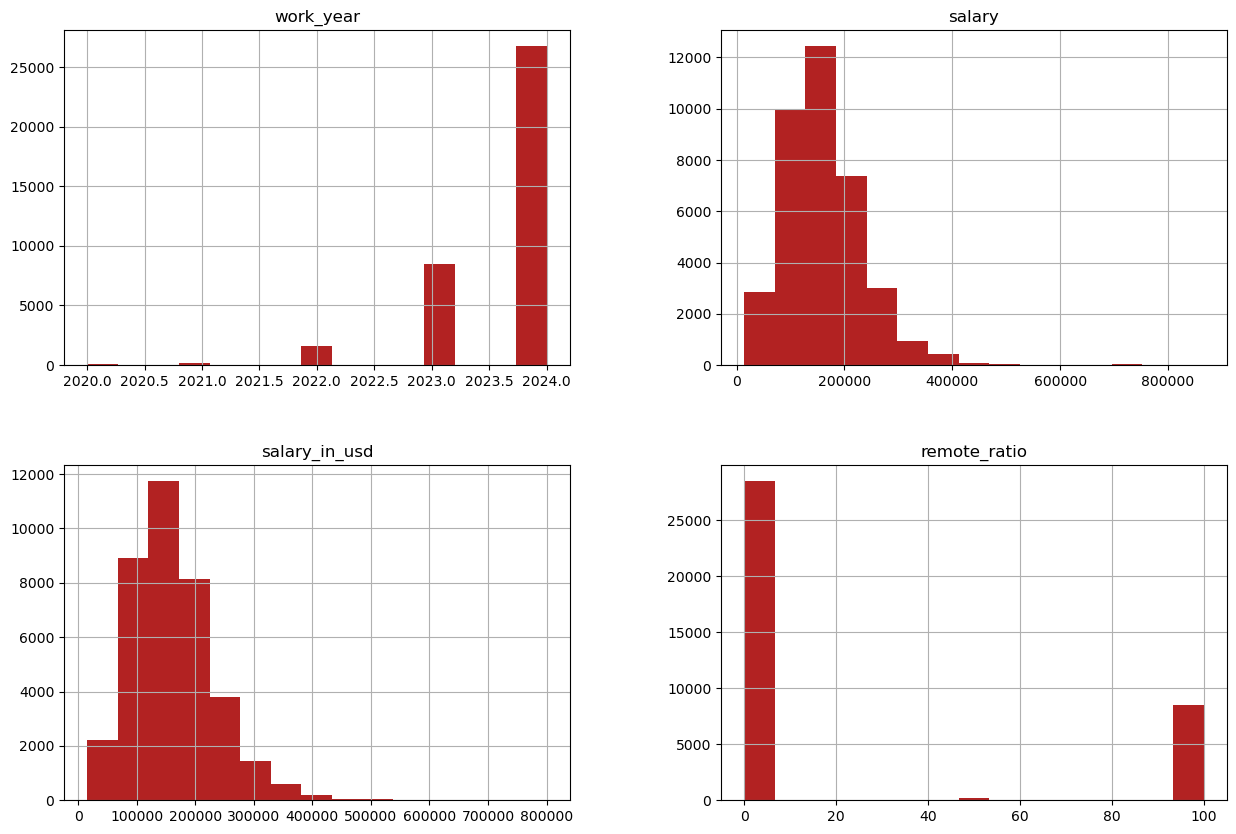

In [12]:
#Histograma das variaveis numéricas
df_filtered[variaveis_numericas].hist(bins=15, figsize=(15, 10), color = 'firebrick')
plt.show()

**Observações Principais:**

* **Concentração Temporal:** A maioria dos dados coletados se concentra no ano de 2024. Isso sugere um foco recente na análise de salários desse período ou um aumento significativo na coleta de dados nesse ano.
* **Faixa Salarial Predominante:** A faixa salarial entre 100 mil e 150 mil dólares americanos é a mais comum no conjunto de dados, indicando uma tendência central nos valores salariais.
* **Modalidade de Trabalho:** A análise preliminar sugere que a modalidade de trabalho presencial é predominante.


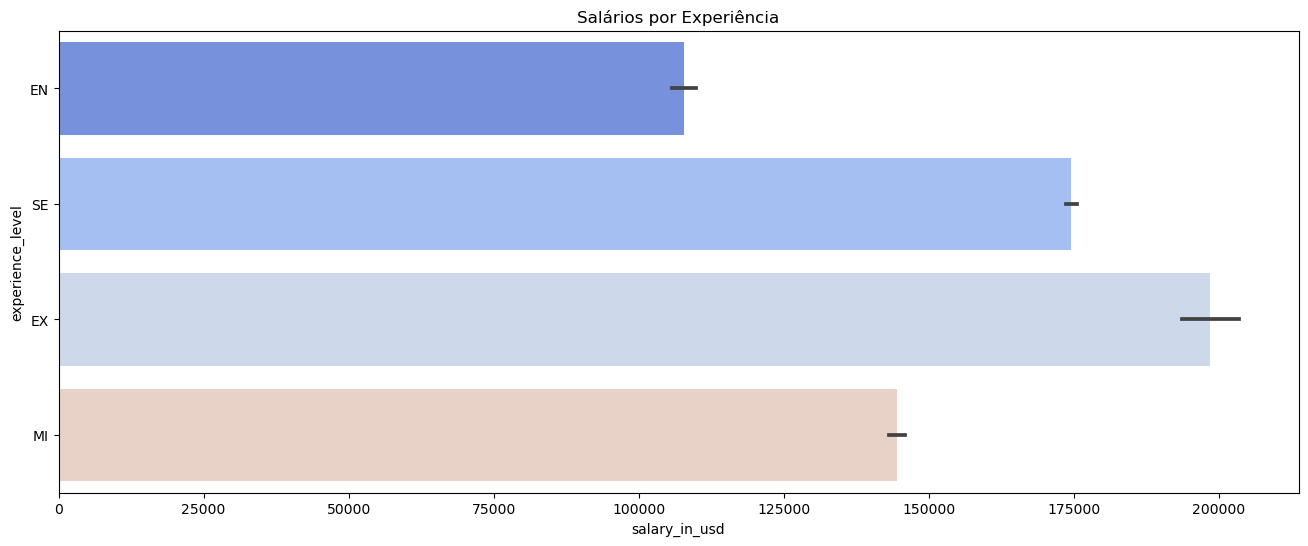

In [13]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_filtered, 
            y = 'experience_level', 
            x = 'salary_in_usd').set(title = 'Salários por Experiência')
plt.show()

* **Tendência:** Há um aumento gradual do salário médio conforme aumenta o nível de experiência, o que é esperado devido à maior qualificação e valorização de profissionais mais experientes.
* **Dispersão:** A dispersão dos salários indica que, mesmo dentro de um mesmo nível de experiência, os salários podem variar significativamente devido a outros fatores como área de atuação, empresa, localização geográfica, etc.
* **Níveis de Experiência:**
    * **EN:** representa o nível de entrada ou com menor experiência, apresentando o menor salário médio.
    * **EX:** Indica o nível de maior experiência, com o maior salário médio.
    * **MI e SE:** São níveis intermediários, com salários entre os extremos.

**Conclusões:**

O gráfico evidencia a importância da experiência profissional na determinação do salário. Profissionais com maior experiência tendem a ter salários mais elevados. No entanto, outros fatores além da experiência, como habilidades específicas, área de atuação e mercado de trabalho, também influenciam a remuneração.


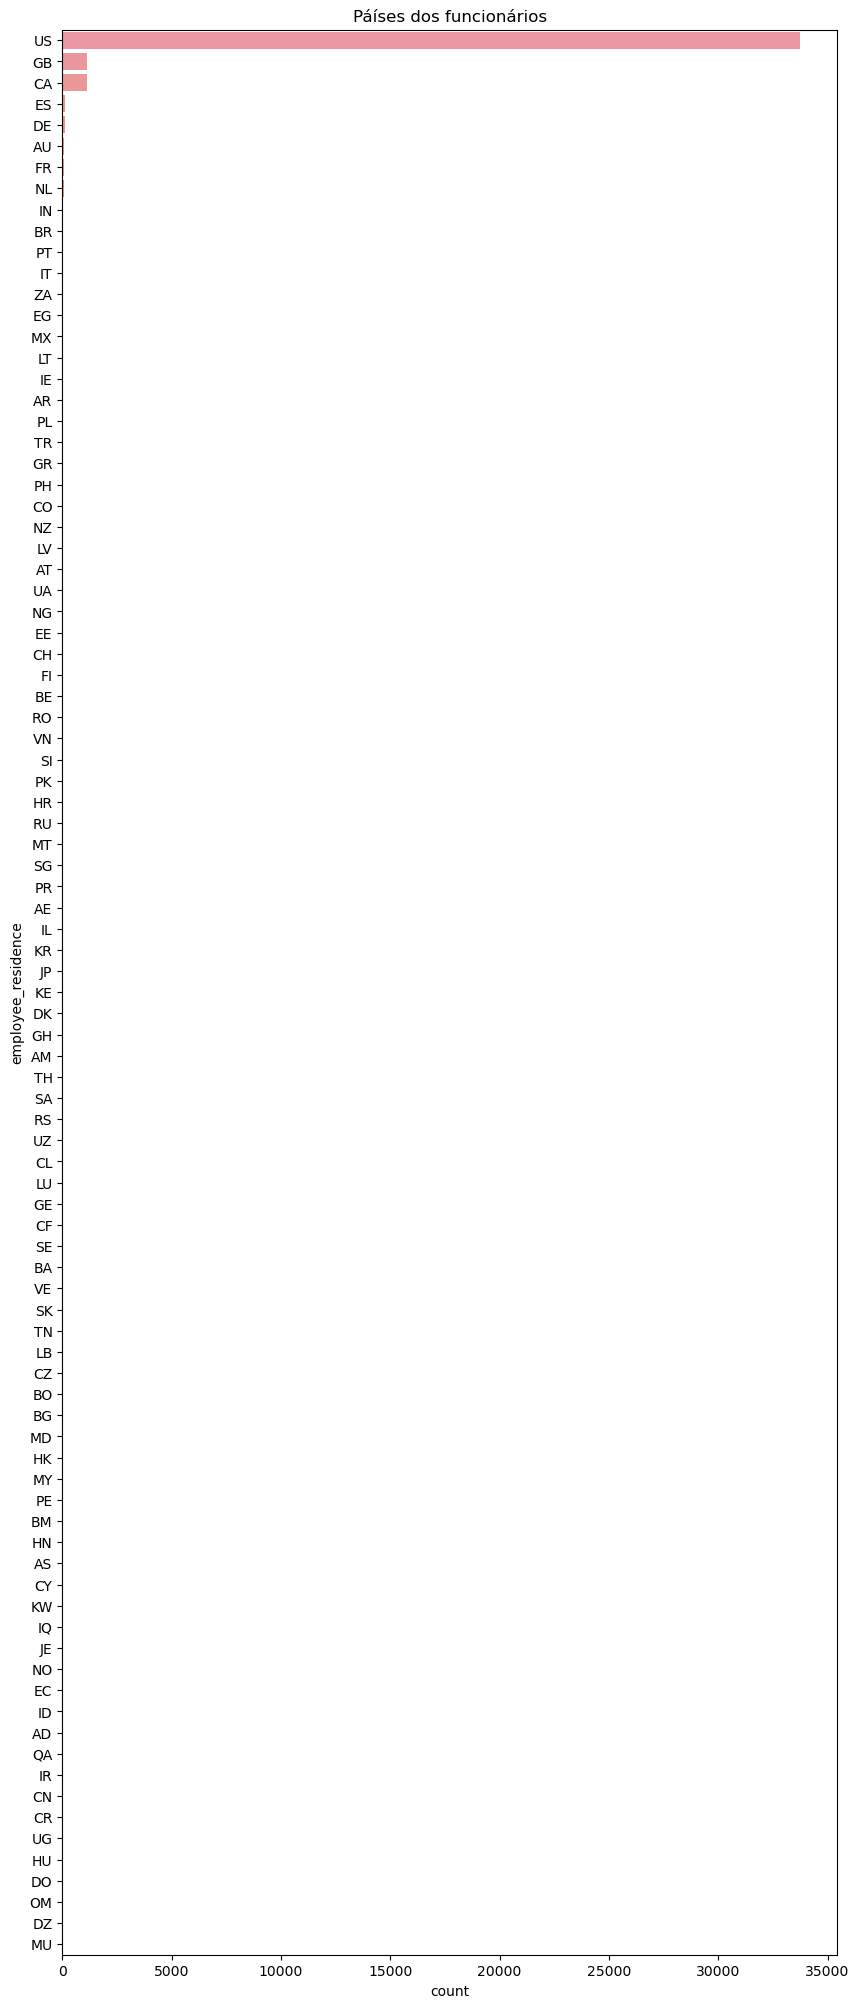

In [14]:
#Descobrindo a distribuição de Países de moradia dos funcionários
plt.figure(figsize=(10, 25))
sns.countplot(y='employee_residence', data=df_filtered, order=df_filtered['employee_residence'].value_counts().index)
plt.title('Páíses dos funcionários')
plt.show()

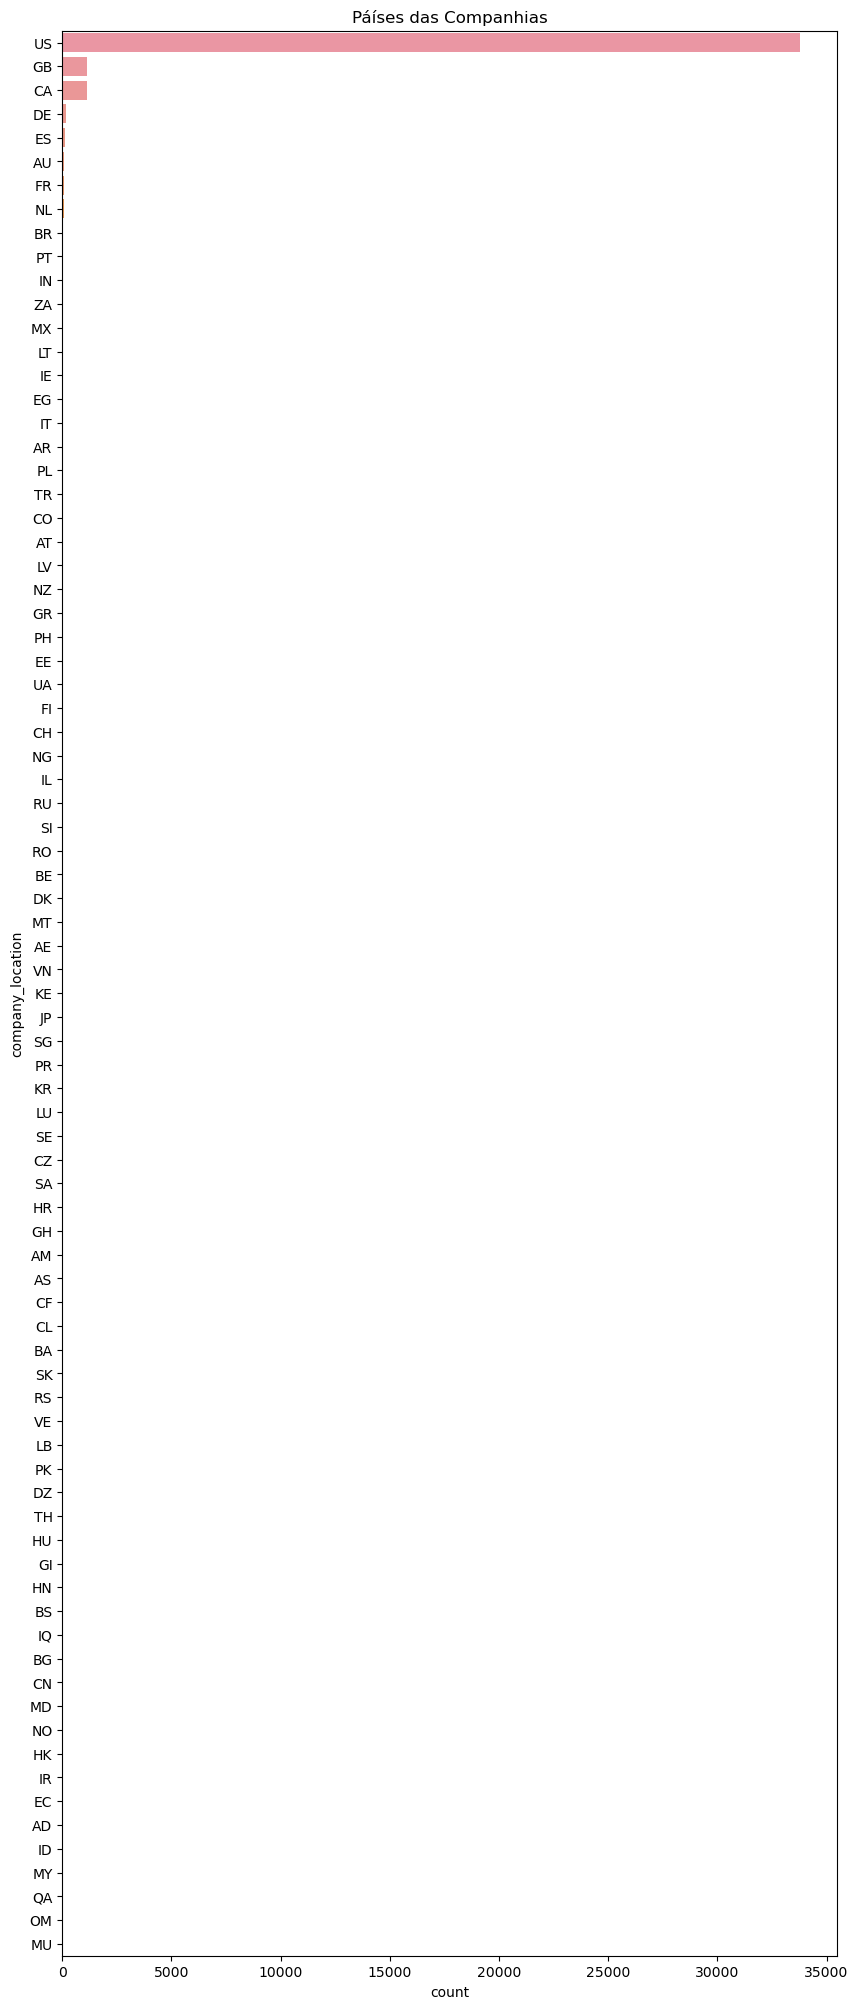

In [15]:
#Descobrindo a distribuição de Países das companhias
plt.figure(figsize=(10, 25))
sns.countplot(y='company_location', data=df_filtered, order=df_filtered['company_location'].value_counts().index)
plt.title('Páíses das Companhias')
plt.show()

## Observação sobre a Distribuição dos Dados

Notamos que a maioria dos dados está concentrado nos seguintes países:
- **USA** (Estados Unidos)
- **GB** (Reino Unido)
- **Canadá**

In [16]:
# Agrupamos por pais e calculamos apenas os 10 com mais dados para melhor visualização
df_dados_Gen = df_filtered.groupby('employee_residence')['salary'].sum().reset_index().sort_values(by = 'salary',
                                                                                    ascending = False).head(10)

In [17]:
# Calculando a média dos salários por país
df_dados_Gen = df_filtered.groupby('employee_residence')['salary'].mean().reset_index().sort_values(by='salary', ascending=False).head(10)

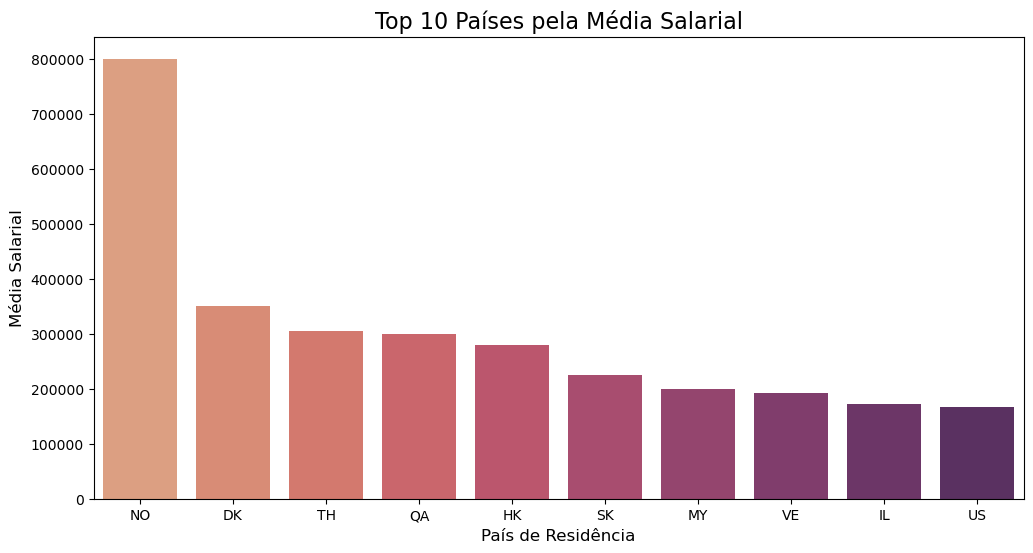

In [18]:
# Configuração do tamanho do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras com Seaborn
sns.barplot(x='employee_residence', y='salary', data=df_dados_Gen, palette='flare')

# Títulos e rótulos
plt.title('Top 10 Países pela Média Salarial', fontsize=16)
plt.xlabel('País de Residência', fontsize=12)
plt.ylabel('Média Salarial', fontsize=12)

# Exibir o gráfico
plt.show()

# Explicação do Gráfico: "Top 10 Países pela Média Salarial"

Este gráfico de barras exibe os 10 países com as maiores médias salariais, com base nos dados de ciência de dados do dataset. A barra mais alta representa o país com a maior média salarial, enquanto as barras menores indicam países com médias salariais mais baixas em comparação.

## Interpretação:
- **Noruega (NO)**: A Noruega tem a maior média salarial, ultrapassando 800.000 unidades monetárias
- **Dinamarca (DK)**: O segundo país com a maior média salarial, em torno de 400.000.
- **Tailândia (TH), Catar (QA), Hong Kong (HK)**: Estes países têm médias salariais semelhantes, próximas de 350.000 unidades monetárias.
- **Coreia do Sul (SK)**: A média salarial da Coreia do Sul está ligeiramente abaixo de Hong Kong.
- **Malásia (MY), Venezuela (VE)**: Estes países têm médias salariais na faixa de 250.000 a 300.000 unidades.
- **Israel (IL), Estados Unidos (US)**: Israel e os Estados Unidos têm as menores médias salariais dentre os 10 primeiros países listados, com valores ligeiramente acima de 200.000 unidades monetárias.

## Observação:
A Noruega destaca-se de forma significativa em relação aos outros países no gráfico, indicando que, de acordo com o dataset, este país oferece uma média salarial consideravelmente maior para profissionais de ciência de dados. 

É importante investigar mais a fundo as razões por trás dessas diferenças, como:
- O custo de vida
- Os setores econômicos predominantes
- A demanda por profissionais qualificatam esses salários.


In [19]:
# Agrupamos por cargo e calculamos apenas os 10 com mais dados para melhor visualização
df_dados_Gen = df_filtered.groupby('job_title')['salary'].sum().reset_index().sort_values(by = 'salary',
                                                                                    ascending = False).head(10)

In [20]:
# Calculando a média dos salários por cargo
df_dados_Gen = df_filtered.groupby('job_title')['salary'].mean().reset_index().sort_values(by='salary', ascending=False).head(10)

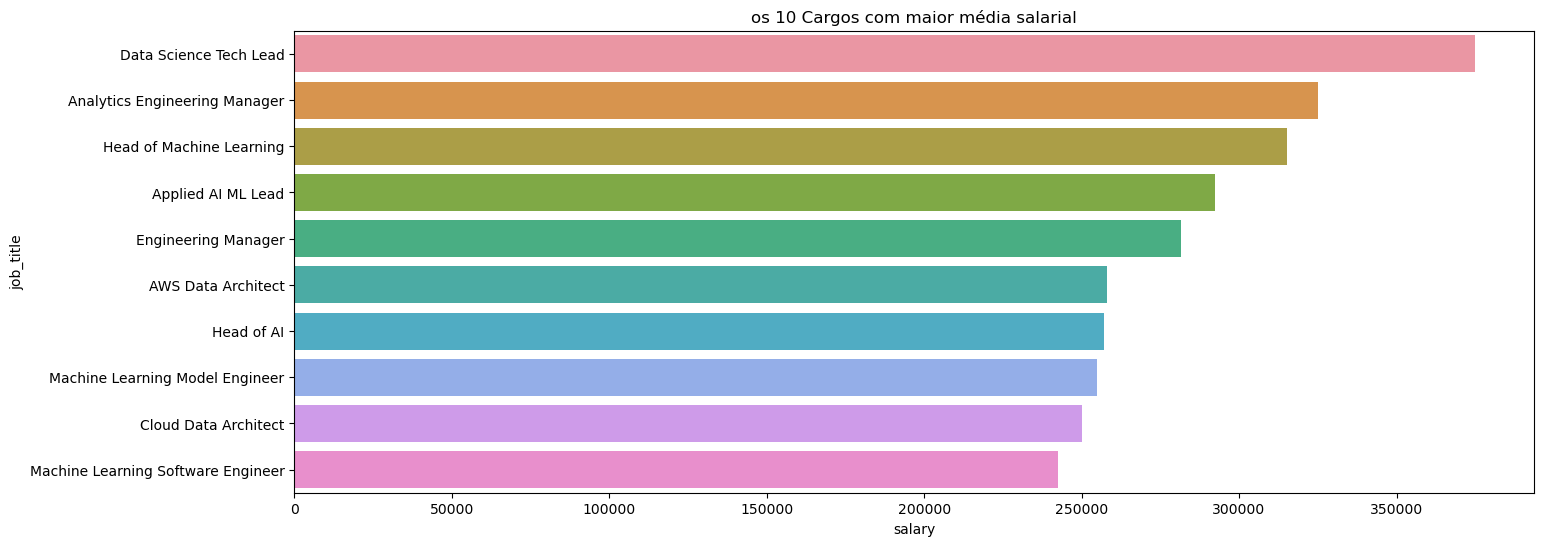

In [21]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_dados_Gen, 
            y = 'job_title', 
            x = 'salary').set(title = 'os 10 Cargos com maior média salarial')
plt.show()

In [22]:
# Obtendo apenas os dados de nível de experiencia de entrada 
experience_df = df_filtered[df_filtered['experience_level'] == 'EN']

In [23]:
# Agrupamos por cargo e calculamos apenas os 10 com mais dados para melhor visualização
df_dados_Gen = experience_df.groupby('job_title')['salary'].sum().reset_index().sort_values(by = 'salary',
                                                                                    ascending = False).head(10)

# Calculando a média dos salários por cargo
df_dados_Gen = experience_df.groupby('job_title')['salary'].mean().reset_index().sort_values(by='salary', ascending=False).head(10)

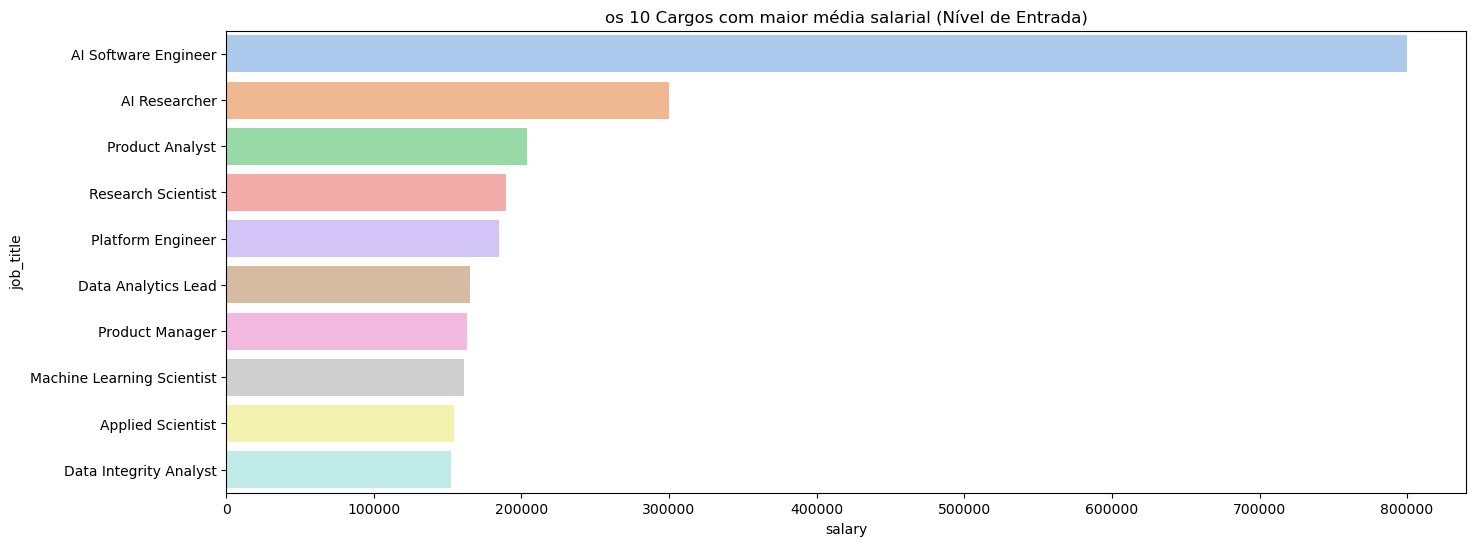

In [24]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('pastel')
sns.barplot(data = df_dados_Gen, 
            y = 'job_title', 
            x = 'salary').set(title = 'os 10 Cargos com maior média salarial (Nível de Entrada)')
plt.show()

* **Dominância da IA:** Cargos relacionados à inteligência artificial dominam o topo da lista, indicando uma alta demanda e remuneração para profissionais dessas áreas.
* **Variedade de Cargos:** A lista abrange diversos cargos, desde engenharia de software até análise de dados, demonstrando a diversidade de oportunidades no mercado.
* **Salários Competitivos:** Os salários médios apresentados são consideravelmente altos, especialmente para níveis de entrada, refletindo a valorização de profissionais qualificados em áreas tecnológicas.


In [25]:
# Obtendo apenas os dados de nível de experiencia de Júnior
experience_df = df_filtered[df_filtered['experience_level'] == 'MI']

In [26]:
# Agrupamos por cargo e calculamos apenas os 10 com mais dados para melhor visualização
df_dados_Gen = experience_df.groupby('job_title')['salary'].sum().reset_index().sort_values(by = 'salary',
                                                                                    ascending = False).head(10)

# Calculando a média dos salários por cargo
df_dados_Gen = experience_df.groupby('job_title')['salary'].mean().reset_index().sort_values(by='salary', ascending=False).head(10)

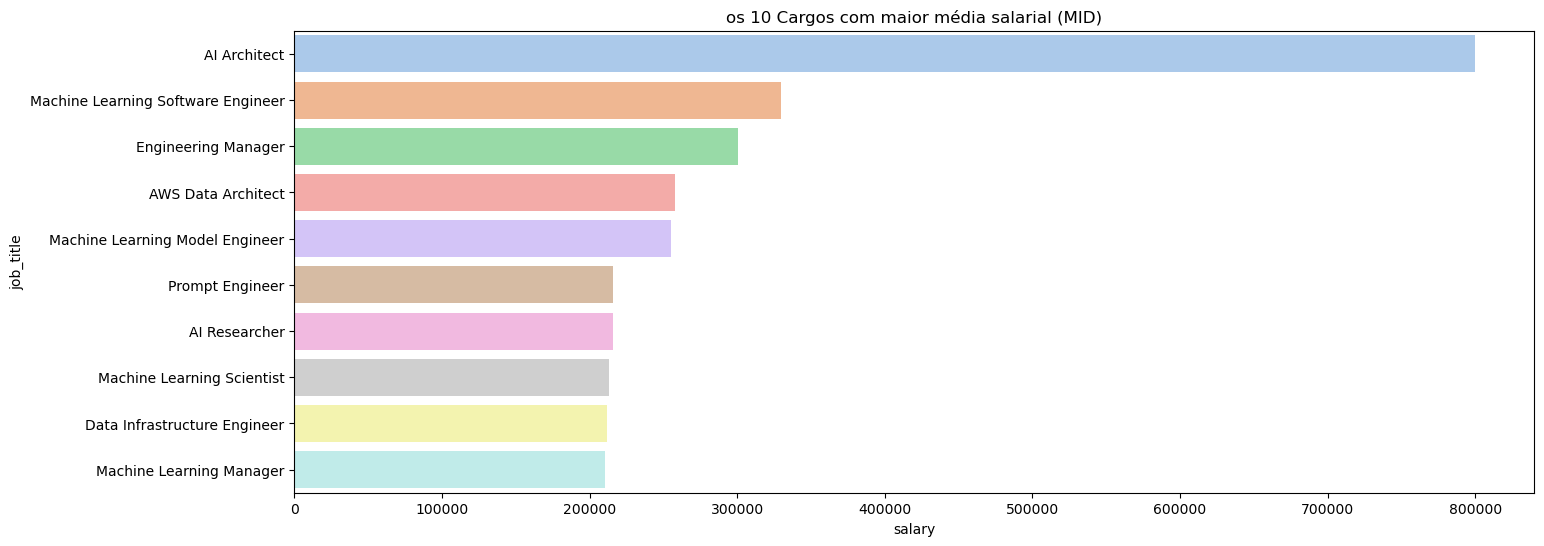

In [27]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('pastel')
sns.barplot(data = df_dados_Gen, 
            y = 'job_title', 
            x = 'salary').set(title = 'os 10 Cargos com maior média salarial (MID)')
plt.show()

* **Especialização:** Os cargos de nível júnior tendem a ser mais específicos, como "Machine Learning Model Engineer" e "Prompt Engineer", indicando uma demanda por profissionais com habilidades técnicas aprofundadas em áreas específicas da IA.
* **Gestão:** A presença de cargos como "Engineering Manager" sugere que, mesmo em níveis mais juniores, as empresas buscam profissionais com habilidades de liderança e gestão de projetos.
* **Arquitetura:** Cargos como "AI Architect" e "AWS Data Architect" indicam a importância da arquitetura de sistemas de IA para as empresas.

In [28]:
# Obtendo apenas os dados de nível de experiencia de Júnior
experience_df = df_filtered[df_filtered['experience_level'] == 'SE']

In [29]:
# Agrupamos por cargo e calculamos apenas os 10 com mais dados para melhor visualização
df_dados_Gen = experience_df.groupby('job_title')['salary'].sum().reset_index().sort_values(by = 'salary',
                                                                                    ascending = False).head(10)

# Calculando a média dos salários por cargo
df_dados_Gen = experience_df.groupby('job_title')['salary'].mean().reset_index().sort_values(by='salary', ascending=False).head(10)

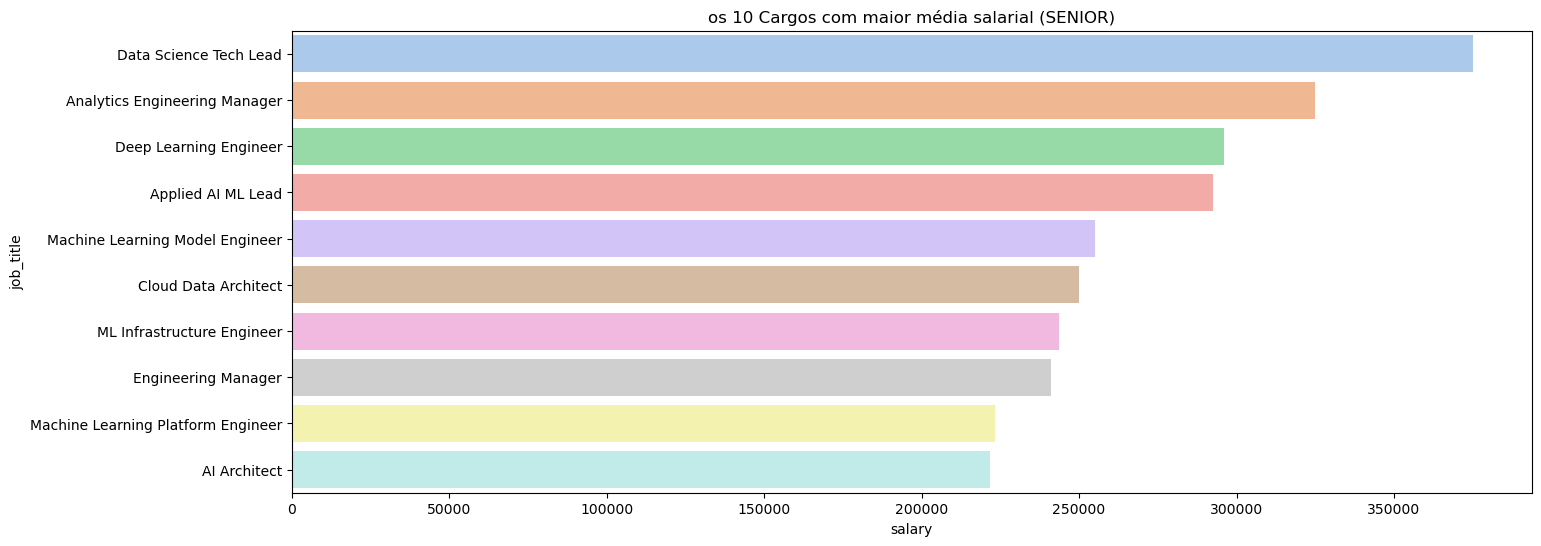

In [30]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('pastel')
sns.barplot(data = df_dados_Gen, 
            y = 'job_title', 
            x = 'salary').set(title = 'os 10 Cargos com maior média salarial (SENIOR)')
plt.show()

* **Liderança Técnica:** A presença de cargos como "Data Science Tech Lead" e "Analytics Engineering Manager" indica uma maior responsabilidade de liderança técnica e gerenciamento de equipes.
* **Especialização Avançada:** Há uma concentração em cargos que exigem conhecimentos mais profundos em áreas como aprendizado profundo, arquitetura de dados e engenharia de nuvem.
* **Visão Estratégica:** Cargos como "Cloud Data Architect" e "AI Architect" demonstram a necessidade de profissionais com uma visão estratégica para o desenvolvimento e implementação de soluções de IA.

## Análise Comparativa Completa: Níveis de Cargos em Data Science

**Observações:**

* **Progressão Salarial:** Os salários aumentam com a experiência.
* **Dominância da IA:** A IA é a área mais demandada em todos os níveis.
* **Especialização:** A especialização é valorizada em todos os níveis.
* **Liderança:** Aumenta com o nível.

**Tabela Comparativa:**

| Característica | Entrada | MID | Senior | Geral |
|---|---|---|---|---|
| Responsabilidade | Menor | Menor | Maior | Maior |
| Especialização | Menos | Menos | Mais | Mais |
| Liderança | Raro | Menos | Mais | Mais |
| Visão Estratégica | Menor | Menor | Maior | Maior |
| Habilidades Técnicas | Básicas | Focadas | Amplas | Amplas |

**Tendências:**

* Demanda crescente.
* Especialização cada vez mais importante.
* Habilidades soft essenciais.
* Ética em IA.